# O Problema do Caxeiro Viajante

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: **/**/2025

## Importando bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randrange, seed
from vpython import rate
import matplotlib.animation as animation


## Informações sobre as bibliotecas

In [ ]:
%load_ext version_information
%version_information Matplotlib, Numpy

## Introdução

O Problema do Caxeiro Viajante é um clássico problema de otimização da matemática. Classificado como NP-hard, não há solução absoluta que retorna a melhor solução para ese problema em tempo polinomial. 

## Simulated Anealling


In [7]:
def mag(x):
    return np.sqrt(x[0]**2+x[1]**2)

def distance(r):
    s = 0.0
    for i in range(N):
        dist = r[i+1]-r[i]
        s+=mag(dist)
    return(s)

In [8]:
def evoluir(r, N, L, Tmin, tau):
    Tmax = 50.0
    

    t = 0
    T = Tmax
    quadros = [r.copy()]
    distancias = [distance(r)]
    
    D = distance(r)
    while(T>Tmin):
        t+=1
        T = Tmax*np.exp(-t/tau)

        c1, c2 = randrange(1,N),randrange(1,N)
        r[c1,0],r[c2,0] = r[c2,0],r[c1,0]
        r[c1,1],r[c2,1] = r[c2,1],r[c1,1]
        Dnew = distance(r)
        dDist = Dnew-D
        if (random()<np.exp(-dDist/T)):
            D = Dnew
            quadros.append(r.copy())
        else:
            r[c1,0],r[c2,0] = r[c2,0],r[c1,0]
            r[c1,1],r[c2,1] = r[c2,1],r[c1,1]
    
        distancias.append(D)    

    return r, quadros, distancias

Teste inicial, com um número pequeno número de cidades. 

In [17]:
N = 15
L = 100 # km...?
r = np.zeros([N+1,2], float)
rc = r.copy()

seed(4)
for i in range(N):
    r[i,0], r[i,1] = random()*L, random()*L
r[N] = r[0]

r, quadros, distancias = evoluir(r, N, L, 1, 0.3*10e3)

Print da trajetória inicial (aleatoria) e a final (dps de aplicada o método), junto com um gráfico da convergencia do método:

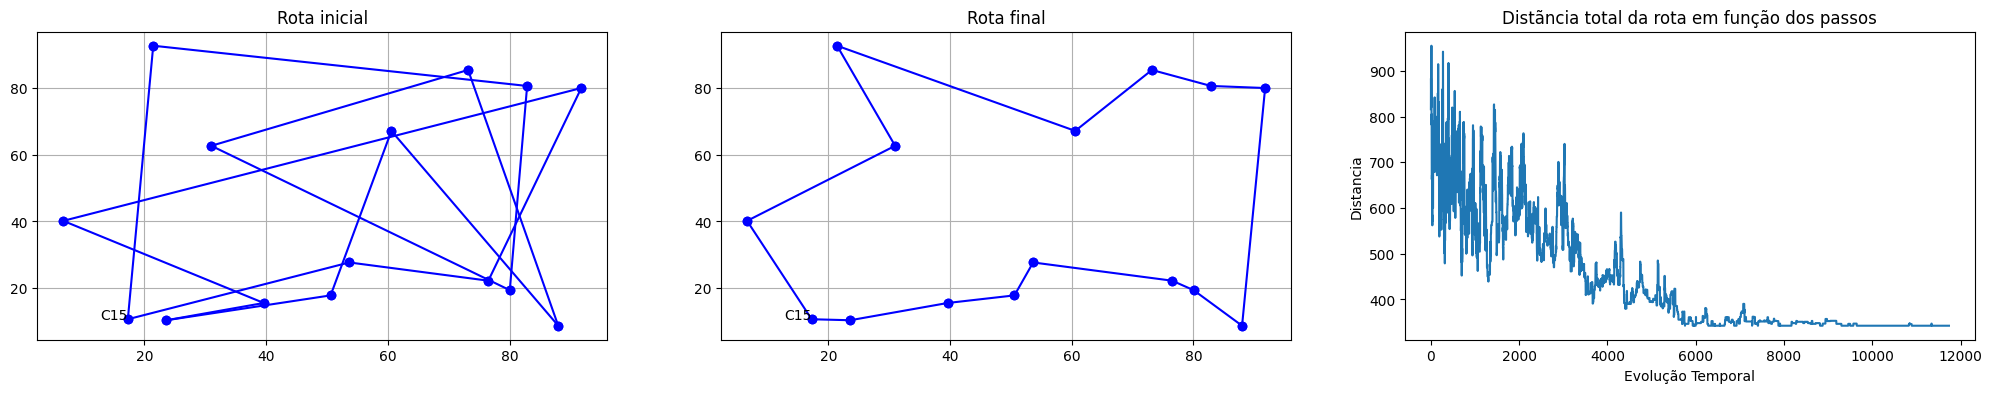

342.3758206910678


In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas

r_inicial = quadros[0]
r_final = quadros[-1]

for i in range(N-1):
        x1,y1 = r_inicial[i,0],r_inicial[i,1]
        x2,y2 = r_inicial[i+1,0],r_inicial[i+1,1]
        axes[0].plot([x1, x2], [y1, y2], 'bo-')
        axes[0].plot(x1, y1, f'C{i + 1}')
    
        x1,y1 = r_final[i,0],r_final[i,1]
        x2,y2 = r_final[i+1,0],r_final[i+1,1]
        axes[1].plot([x1, x2], [y1, y2], 'bo-')
        axes[1].plot(x1, y1, f'C{i + 1}')

x1, y1 = r_inicial[N-1,0], r_inicial[N-1,1]
x2, y2 = r_inicial[0,0], r_inicial[0,1]
axes[0].plot([x1, x2], [y1, y2], 'bo-')
axes[0].text(*r[N-1], f'C{N}', fontsize=10, ha='right')
axes[0].grid(True)
axes[0].set_title("Rota inicial")

x1, y1 = r_final[N-1,0], r_final[N-1,1]
x2, y2 = r_final[0,0], r_final[0,1]
axes[1].plot([x1, x2], [y1, y2], 'bo-')
axes[1].text(*r[N-1], f'C{N}', fontsize=10, ha='right')
axes[1].grid(True)
axes[1].set_title("Rota final")

axes[2].plot(distancias)
axes[2].set_xlabel("Evolução Temporal")
axes[2].set_ylabel("Distancia")
axes[2].set_title("Distãncia total da rota em função dos passos")

plt.show()
print(distance(r))

Animaçãozinha

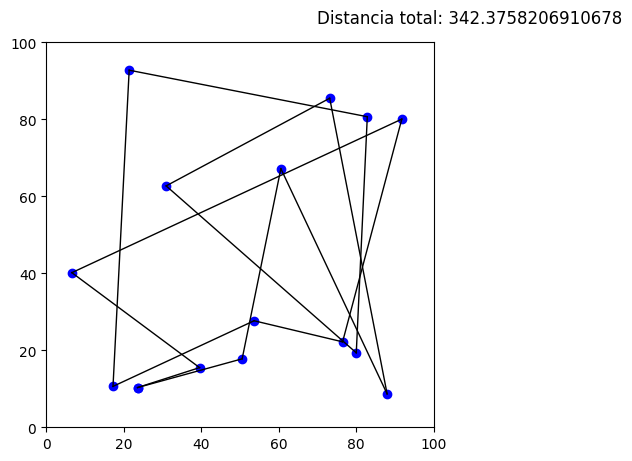

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, L)
ax.set_ylim(0, L)

r = quadros[0]
cidades, = ax.plot(r[:,0], r[:,1], 'bo') 
linhas = [ax.plot([], [], '-', color='k', lw=1)[0] for _ in range(N)]
porcentagem = ax.text(0,L+5,'',fontsize = 12, color = 'black')
distancia = ax.text(70,L+5,'', fontsize = 12, color = 'black')

def init():
    for i in range(N):
        x1, y1 = r[i,0], r[i,1]
        x2, y2 = r[i+1,0], r[i+1,1]
        linhas[i].set_data([x1,x2],[y1,y2])
        
    porcentagem.set_text('')
    return linhas + [cidades], porcentagem, distancia


def animate(i):
    r = quadros[i]
    for j in range(N):            
        x1, y1 = r[j,0], r[j,1]
        x2, y2 = r[j+1,0], r[j+1,1]
        linhas[j].set_data([x1,x2],[y1,y2])

    porcentagem.set_text(f'Evolução: {(i/len(quadros))*100:.1f}%')
    distancia.set_text(f'Distancia total: {distance(r)}')
    return linhas + [cidades], porcentagem, distancia


ani = animation.FuncAnimation(fig, animate, np.arange(1,len(quadros)), init_func=init, interval=30)

ani.save('primeiro_gif.gif', writer='pillow', dpi = 80)


## Self-Organizing Maps

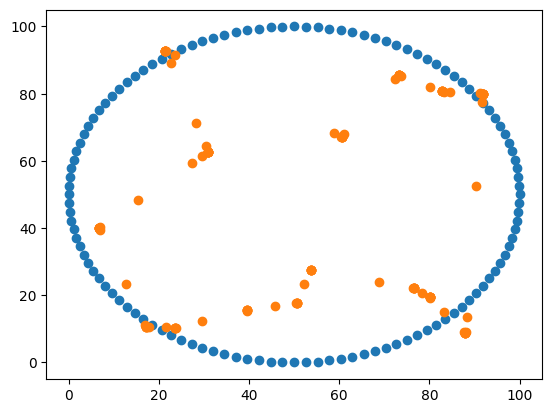

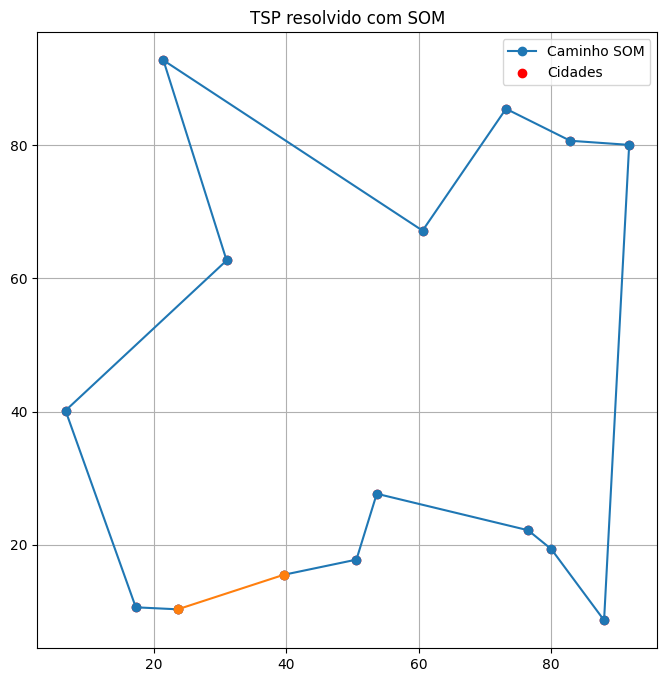

In [21]:
# Parâmetros
num_cidades = 15
num_neuronios = 8 * num_cidades  # mais neurônios que cidades
num_epocas = 1000
alpha_inicial = 0.8
raio_inicial = num_neuronios // 2
decaimento_constante = num_epocas / np.log(raio_inicial)


N = 15
L= 100
seed(4)
cidades = np.zeros([N,2], float)
for i in range(N):
    cidades[i,0], cidades[i,1] = random()*L, random()*L

# Gerar cidades aleatórias no plano [0,1]x[0,1]






# Inicializar neurônios em um círculo
theta = np.linspace(0, 2*np.pi, num_neuronios, endpoint=False)
neuronios = np.column_stack((L*np.cos(theta), L*np.sin(theta))) * 0.5 + L//2  # centralizado no [0,1]x[0,1]

plt.plot(neuronios[:,0], neuronios[:,1], "o")

# Função de distância euclidiana
def distancia(a, b):
    return np.linalg.norm(a - b, axis=1)

# Treinamento SOM
for epoca in range(num_epocas):
    cidade_idx = np.random.randint(num_cidades)
    cidade = cidades[cidade_idx]

    # Encontrar neurônio vencedor
    distancias = distancia(neuronios, cidade)
    vencedor_idx = np.argmin(distancias)

    # Decaimento dos parâmetros
    alpha = alpha_inicial * np.exp(-epoca / num_epocas)
    raio = raio_inicial * np.exp(-epoca / decaimento_constante)

    # Atualizar neurônios
    for i in range(num_neuronios):
        # distância circular entre os neurônios (SOM é um anel)
        delta = min(abs(i - vencedor_idx), num_neuronios - abs(i - vencedor_idx))
        if delta < raio:
            influencia = np.exp(-delta**2 / (2 * (raio**2)))
            neuronios[i] += alpha * influencia * (cidade - neuronios[i])

# Obter ordem final das cidades
ordem = []
for cidade in cidades:
    distancias = distancia(neuronios, cidade)
    idx = np.argmin(distancias)
    ordem.append((idx, cidade))
ordem.sort()
caminho = np.array([cidade for _, cidade in ordem])

# Plotar resultado
plt.plot(neuronios[:,0], neuronios[:,1], "o")
plt.show()



plt.figure(figsize=(8, 8))
plt.plot(caminho[:, 0], caminho[:, 1], 'o-', label='Caminho SOM')
plt.plot([caminho[-1, 0], caminho[0, 0]], [caminho[-1, 1], caminho[0, 1]], 'o-')  # fechar o ciclo
plt.scatter(cidades[:, 0], cidades[:, 1], c='red', label='Cidades')
plt.title('TSP resolvido com SOM')
plt.legend()
plt.grid(True)
plt.show()
